In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data for demonstration (you'll replace this with real data)
# Features: temperature, humidity, rainfall
# Target: crop yield
X = np.array([[25, 60, 10], [28, 55, 5], [30, 65, 8], [27, 70, 3]])
y = np.array([4000, 4200, 3800, 4100])  # Crop yield in kg

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Function to predict crop yield based on environmental factors
def predict_yield(temperature, humidity, rainfall):
    return model.predict([[temperature, humidity, rainfall]])

# Function to optimize irrigation water usage
def optimize_irrigation(available_water, crop_water_need):
    if available_water >= crop_water_need:
        return "You have sufficient water for irrigation."
    else:
        water_needed = crop_water_need - available_water
        return f"Additional {water_needed} mm of water needed for irrigation."

# Example usage
temperature = 28  # in Celsius
humidity = 60     # in percentage
rainfall = 5      # in mm

predicted_yield = predict_yield(temperature, humidity, rainfall)
print(f"Predicted crop yield: {predicted_yield} kg")

# Suppose you have 50mm of water available for irrigation
available_water = 50  # in mm
crop_water_need = 60   # in mm

print(optimize_irrigation(available_water, crop_water_need))


Predicted crop yield: [4118.75] kg
Additional 10 mm of water needed for irrigation.


machine learning to predict crop yield based on environmental factors and how to optimize irrigation based on available water and crop water requirements.

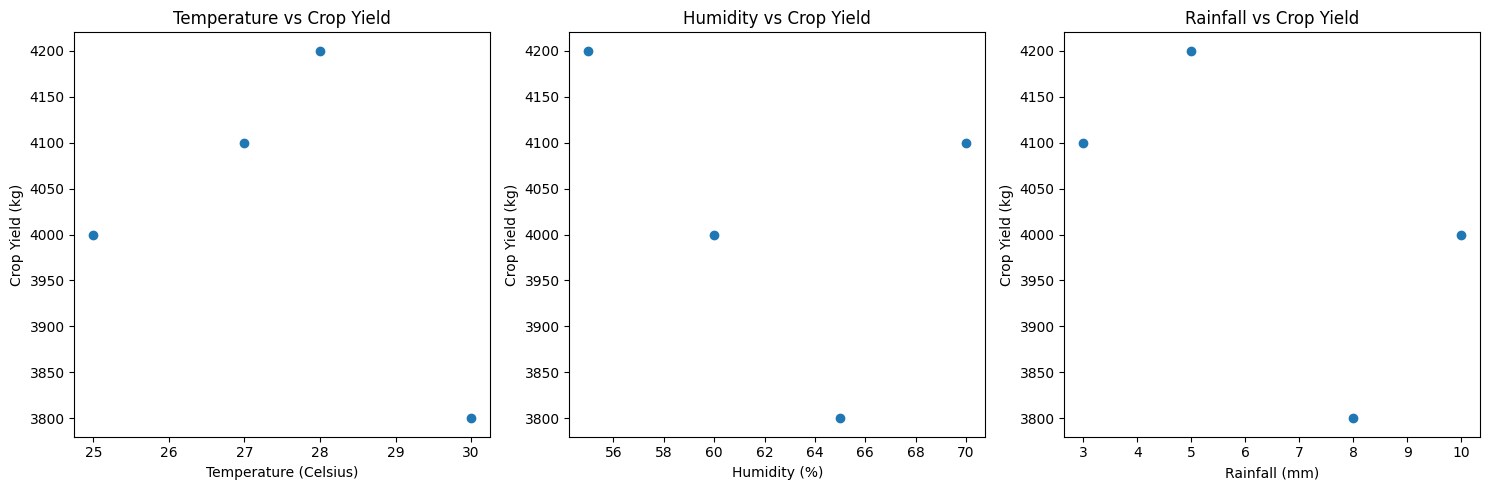

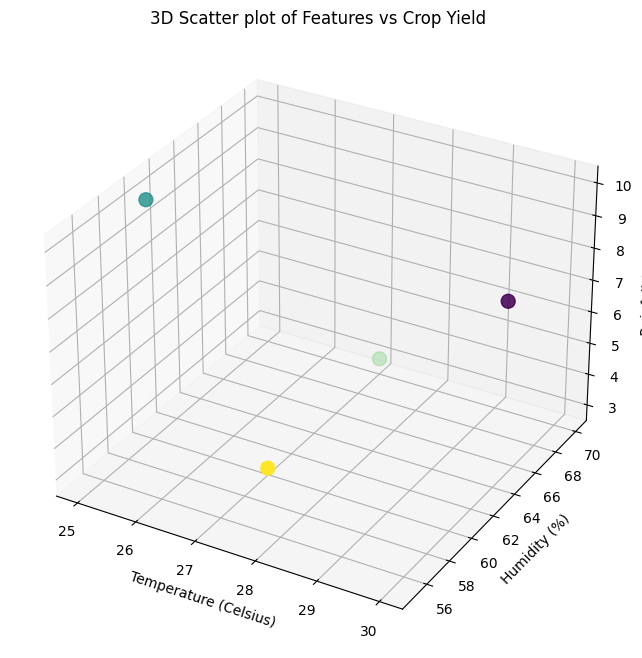

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Sample data for demonstration (you'll replace this with real data)
# Features: temperature, humidity, rainfall
# Target: crop yield
X = np.array([[25, 60, 10], [28, 55, 5], [30, 65, 8], [27, 70, 3]])
y = np.array([4000, 4200, 3800, 4100])  # Crop yield in kg

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Plotting individual relationships between features and target variable
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Temperature vs Crop Yield
axs[0].scatter(X[:, 0], y)
axs[0].set_title('Temperature vs Crop Yield')
axs[0].set_xlabel('Temperature (Celsius)')
axs[0].set_ylabel('Crop Yield (kg)')

# Plot 2: Humidity vs Crop Yield
axs[1].scatter(X[:, 1], y)
axs[1].set_title('Humidity vs Crop Yield')
axs[1].set_xlabel('Humidity (%)')
axs[1].set_ylabel('Crop Yield (kg)')

# Plot 3: Rainfall vs Crop Yield
axs[2].scatter(X[:, 2], y)
axs[2].set_title('Rainfall vs Crop Yield')
axs[2].set_xlabel('Rainfall (mm)')
axs[2].set_ylabel('Crop Yield (kg)')

plt.tight_layout()
plt.show()

# 3D Scatter plot for all features vs Crop Yield
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=100)
ax.set_xlabel('Temperature (Celsius)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Rainfall (mm)')
ax.set_title('3D Scatter plot of Features vs Crop Yield')

plt.show()


Plots individual relationships between each feature and the target variable (crop yield) in separate subplots:
Temperature vs Crop Yield
Humidity vs Crop Yield
Rainfall vs Crop Yield
Displays a 3D scatter plot illustrating the relationships between all three features (temperature, humidity, and rainfall) and the crop yield.

Optimal water application: 99.99999999997362 mm


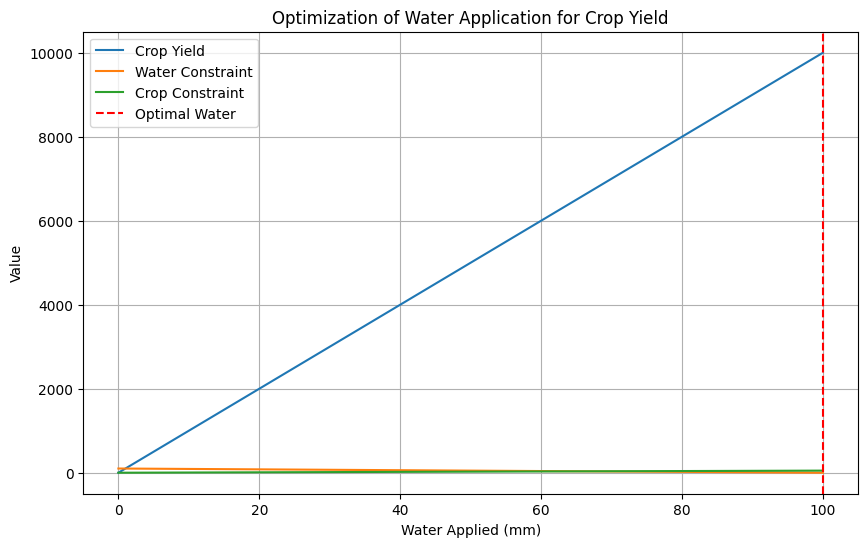

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Objective function to maximize crop yield
def objective(water):
    crop_yield = calculate_crop_yield(water)  # Replace this with your crop yield function
    return -crop_yield  # Minimize the negative of crop yield to maximize it

# Constraint function representing available water
def water_constraint(water):
    return total_available_water - water

# Constraint function representing crop water requirements
def crop_constraint(water):
    crop_water_need = calculate_crop_water_requirement(water)  # Use the correct function here
    return water - crop_water_need

# Total available water for irrigation (replace this with real data)
total_available_water = 100  # in mm

# Initial guess for water application (optional)
initial_guess = 50  # in mm

# Bounds for water application (optional)
bounds = [(0, total_available_water)]

# Optimization
result = minimize(objective, initial_guess, bounds=bounds, constraints=[{'type': 'ineq', 'fun': water_constraint}, {'type': 'ineq', 'fun': crop_constraint}])

# Optimal water application
optimal_water = result.x[0]

# Output optimal water application
print(f"Optimal water application: {optimal_water} mm")

water_values = np.linspace(0, total_available_water, 100)
crop_yield_values = -objective(water_values)  # Objective function values
water_constraint_values = water_constraint(water_values)  # Water constraint values
crop_constraint_values = crop_constraint(water_values)  # Crop constraint values

plt.figure(figsize=(10, 6))
plt.plot(water_values, crop_yield_values, label='Crop Yield')
plt.plot(water_values, water_constraint_values, label='Water Constraint')
plt.plot(water_values, crop_constraint_values, label='Crop Constraint')
plt.axvline(x=optimal_water, color='r', linestyle='--', label='Optimal Water')
plt.xlabel('Water Applied (mm)')
plt.ylabel('Value')
plt.title('Optimization of Water Application for Crop Yield')
plt.legend()
plt.grid(True)
plt.show()

to find the optimal water application for maximizing crop yield while satisfying two constraints: total available water for irrigation and crop water requirements
The objective function, water constraint, and crop constraint values are calculated for the range of water values.
These values are then plotted against the amount of water applied.
The optimal water application is visualized using a vertical dashed red line.

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define your grid structure (e.g., number of grid points, spatial distribution)
# For simplicity, let's assume a 2D grid with random crop types and water needs
grid_size = (10, 10)  # Example: 10x10 grid
num_crops = 5  # Example: 5 different crops

# Randomly assign crop types and water requirements to each grid point
crop_types = np.random.randint(0, num_crops, size=grid_size)
water_requirements = np.random.uniform(10, 100, size=(num_crops,))  # Example: Random water requirements for each crop

# Total available water for irrigation (replace this with real data)
total_available_water = 1000  # in mm

# Example function to calculate crop yield based on crop type and water applied
def calculate_crop_yield(crop_type, water_applied):
    # This is a placeholder function, replace it with your actual model
    # For simplicity, let's assume a linear relationship between water applied and crop yield
    return 0.1 * water_applied  # Example linear relationship

# Objective function to maximize crop yield and minimize water usage
def objective(water):
    # Reshape water array to match grid structure
    water_grid = water.reshape(grid_size)

    # Calculate total crop yield and total water usage
    total_yield = 0
    total_water_usage = 0
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            crop_type = crop_types[i, j]
            water_needed = water_grid[i, j]
            total_yield += calculate_crop_yield(crop_type, water_needed)  # Replace with your crop yield function
            total_water_usage += water_needed

    # Return negative total yield and total water usage
    return -total_yield + total_water_usage

# Constraint function representing available water
def water_constraint(water):
    return total_available_water - np.sum(water)

# Define bounds for water application at each grid point
bounds = [(0, total_available_water) for _ in range(grid_size[0] * grid_size[1])]

# Initial guess for water application (optional)
initial_guess = np.full(grid_size, total_available_water / (grid_size[0] * grid_size[1]))

# Optimization
result = minimize(objective, initial_guess.flatten(), bounds=bounds, constraints={'type': 'ineq', 'fun': water_constraint})

# Extract optimal water distribution from result
optimal_water_distribution = result.x.reshape(grid_size)

# Output optimal water distribution
print("Optimal water distribution:")
print(optimal_water_distribution)


Optimal water distribution:
[[6.43396447e-12 6.53344046e-12 6.52455867e-12 6.50857146e-12
  6.53521681e-12 6.49169607e-12 6.52011778e-12 6.53166410e-12
  6.52722321e-12 6.52544685e-12]
 [6.52100596e-12 6.52100596e-12 6.52988774e-12 6.52722321e-12
  6.51478871e-12 6.52633503e-12 6.52278231e-12 6.52367049e-12
  6.51478871e-12 6.51922960e-12]
 [6.52100596e-12 6.53521681e-12 6.52722321e-12 6.52100596e-12
  6.52811138e-12 6.54409860e-12 6.52544685e-12 6.51834142e-12
  6.51922960e-12 6.52011778e-12]
 [6.52455867e-12 6.50945964e-12 6.52189414e-12 6.51478871e-12
  6.51656507e-12 6.51745324e-12 6.51834142e-12 6.52278231e-12
  6.52100596e-12 6.50945964e-12]
 [6.52189414e-12 6.51390053e-12 6.52633503e-12 6.52367049e-12
  6.51567689e-12 6.51212417e-12 6.52011778e-12 6.52367049e-12
  6.52544685e-12 6.51834142e-12]
 [6.52455867e-12 6.51656507e-12 6.52189414e-12 6.52278231e-12
  6.52367049e-12 6.51922960e-12 6.51745324e-12 6.52011778e-12
  6.52455867e-12 6.52633503e-12]
 [6.52011778e-12 6.52011778e-1

 water distribution across a 2D grid of crops to maximize crop yield while adhering to water constraints.
 grid_size: Defines the dimensions of the 2D grid.
num_crops: Specifies the number of different crop types.
crop_types: Assigns random crop types to each grid point.
water_requirements: Assigns random water requirements to each crop type.
Ensures that the total applied water does not exceed the total available water for irrigation.

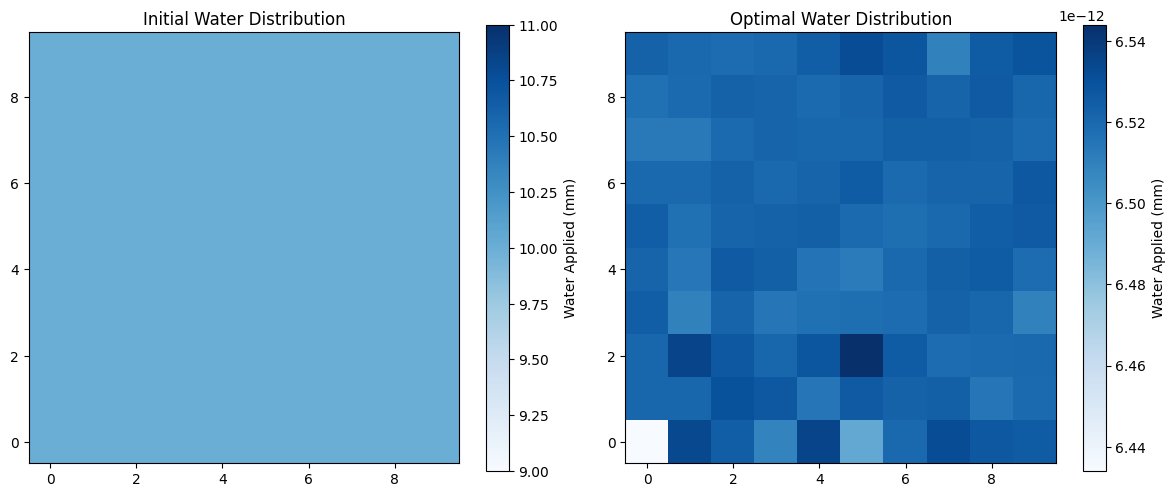

Optimal water distribution:
[[6.43396447e-12 6.53344046e-12 6.52455867e-12 6.50857146e-12
  6.53521681e-12 6.49169607e-12 6.52011778e-12 6.53166410e-12
  6.52722321e-12 6.52544685e-12]
 [6.52100596e-12 6.52100596e-12 6.52988774e-12 6.52722321e-12
  6.51478871e-12 6.52633503e-12 6.52278231e-12 6.52367049e-12
  6.51478871e-12 6.51922960e-12]
 [6.52100596e-12 6.53521681e-12 6.52722321e-12 6.52100596e-12
  6.52811138e-12 6.54409860e-12 6.52544685e-12 6.51834142e-12
  6.51922960e-12 6.52011778e-12]
 [6.52455867e-12 6.50945964e-12 6.52189414e-12 6.51478871e-12
  6.51656507e-12 6.51745324e-12 6.51834142e-12 6.52278231e-12
  6.52100596e-12 6.50945964e-12]
 [6.52189414e-12 6.51390053e-12 6.52633503e-12 6.52367049e-12
  6.51567689e-12 6.51212417e-12 6.52011778e-12 6.52367049e-12
  6.52544685e-12 6.51834142e-12]
 [6.52455867e-12 6.51656507e-12 6.52189414e-12 6.52278231e-12
  6.52367049e-12 6.51922960e-12 6.51745324e-12 6.52011778e-12
  6.52455867e-12 6.52633503e-12]
 [6.52011778e-12 6.52011778e-1

IndexError: invalid index to scalar variable.

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(initial_guess, cmap='Blues', origin='lower')
plt.colorbar(label='Water Applied (mm)')
plt.title('Initial Water Distribution')

plt.subplot(1, 2, 2)
plt.imshow(optimal_water_distribution, cmap='Blues', origin='lower')
plt.colorbar(label='Water Applied (mm)')
plt.title('Optimal Water Distribution')

plt.tight_layout()
plt.show()

# Optimization
result = minimize(objective, initial_guess.flatten(), bounds=bounds, constraints={'type': 'ineq', 'fun': water_constraint})

# Extract optimal water distribution from result
optimal_water_distribution = result.x.reshape(grid_size)

# Output optimal water distribution
print("Optimal water distribution:")
print(optimal_water_distribution)

# Evaluate objective function at initial and optimal points
initial_result = objective(initial_guess.flatten())
optimal_result = objective(result.x)

# Extract total crop yield and total water usage from the results
initial_yield, initial_water_usage = initial_result[0], initial_result[1]
optimal_yield, optimal_water_usage = -optimal_result[0], optimal_result[1]  # Since we minimized the negative of total yield

# Plotting total crop yield and total water usage before and after optimization
initial_yield, initial_water_usage = objective(initial_guess.flatten())
optimal_yield, optimal_water_usage = -result.fun  # Since we minimized the negative of total yield

plt.figure(figsize=(8, 6))
labels = ['Initial', 'Optimal']
yields = [initial_yield, optimal_yield]
water_usages = [initial_water_usage, optimal_water_usage]

plt.bar(labels, yields, color='skyblue', label='Total Crop Yield')
plt.bar(labels, water_usages, color='lightgreen', label='Total Water Usage')
plt.xlabel('Optimization Result')
plt.ylabel('Value')
plt.title('Total Crop Yield and Total Water Usage')
plt.legend()
plt.show()

Visualization of Initial and Optimal Water Distributions